In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
import torchvision
import os
from PIL import Image

In [3]:
def read_images(dir_path):
    images = []
    for image_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, image_name)
        image = torch.Tensor(np.array((Image.open(img_path).convert("L").resize((960, 960))))).to("cuda")
        image = image.unsqueeze(0)
        images.append(image)
    return images

val_images = read_images("data/val_images")
train_images = read_images("data/train_images")

In [4]:
val_masks = read_images("data/val_masks")

### Changing model architecture

In [9]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)

Using cache found in C:\Users\Opina/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_MobileNet_V3_Large_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
model

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride

In [4]:
model = torchvision.models.segmentation.deeplabv3_mobilenet_v3_large()
model.backbone["0"][0] = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1, bias=False)
model.classifier[4] = nn.Conv2d(256, 1, kernel_size=1, stride=1)
model = model.cuda()
model.eval()
x = torch.randn(1, 1, 960, 960).cuda()
output = model(x)

In [6]:
model

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride

In [5]:
output

OrderedDict([('out',
              tensor([[[[0.0665, 0.0665, 0.0665,  ..., 0.0483, 0.0483, 0.0483],
                        [0.0665, 0.0665, 0.0665,  ..., 0.0483, 0.0483, 0.0483],
                        [0.0665, 0.0665, 0.0665,  ..., 0.0483, 0.0483, 0.0483],
                        ...,
                        [0.0496, 0.0496, 0.0496,  ..., 0.0538, 0.0538, 0.0538],
                        [0.0496, 0.0496, 0.0496,  ..., 0.0538, 0.0538, 0.0538],
                        [0.0496, 0.0496, 0.0496,  ..., 0.0538, 0.0538, 0.0538]]]],
                     device='cuda:0', grad_fn=<UpsampleBilinear2DBackward0>))])

### Testing

In [59]:
model = torchvision.models.segmentation.deeplabv3_mobilenet_v3_large(return_dict=False)
model.backbone["0"][0] = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1, bias=False)
model.classifier[4] = nn.Conv2d(256, 1, kernel_size=1, stride=1)
model.load_state_dict(torch.load("my_checkpoint.pth.tar")["state_dict"])

<All keys matched successfully>

In [60]:
model = model.cuda()
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride

In [61]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params / 1e6}M")

Number of parameters: 11.020049M


In [62]:
result = model.forward(train_images[1].unsqueeze(0))

In [63]:
result

OrderedDict([('out',
              tensor([[[[ 35.2819,  35.2819,  35.2819,  ...,   0.8919,   0.8919,   0.8919],
                        [ 35.2819,  35.2819,  35.2819,  ...,   0.8919,   0.8919,   0.8919],
                        [ 35.2819,  35.2819,  35.2819,  ...,   0.8919,   0.8919,   0.8919],
                        ...,
                        [-28.3042, -28.3042, -28.3042,  ..., -54.1526, -54.1526, -54.1526],
                        [-28.3042, -28.3042, -28.3042,  ..., -54.1526, -54.1526, -54.1526],
                        [-28.3042, -28.3042, -28.3042,  ..., -54.1526, -54.1526, -54.1526]]]],
                     device='cuda:0', grad_fn=<UpsampleBilinear2DBackward0>))])

In [1]:
plt.imshow(train_images[1].detach().cpu().squeeze(0), cmap="gray")

NameError: name 'plt' is not defined

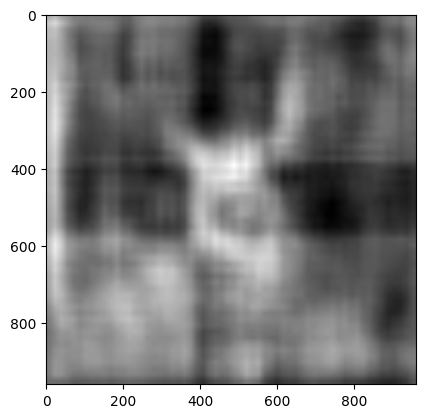

In [65]:
plt.imshow(np.transpose(np.array(result["out"].to("cpu").detach())[0], (1, 2, 0)), cmap="gray")

### Exporting

In [66]:
traced_script_module = torch.jit.trace(model, train_images[0].unsqueeze(0), strict=False)

In [67]:
traced_script_module.save("deeplab_exported.torchscript")